# Métodos de Monte Carlo

Es el nombre que se le da a las técnicas que utilizan generación de métodos aleatorios para resolver problemas en la computadora.

# Números aleatorios

¿Qué es _random_ ?¿Existe?

Las personas batallan mucho para generar aleatoriedad por si mismas.

Las computadoras son máquinas deterministas.

Usaremos **números pseudo aleatorios**.


**Ejercicio** Programa el generador aleatorio de tipo [_linear congruential_](http://en.wikipedia.org/wiki/Linear_congruential_generator):
    
$$x_{n+1} = (a x_n + b) \mod c$$

Para que sea más fácil, utiliza el concepto de [`generators`](http://anandology.com/python-practice-book/iterators.html) de **Python**




<div class="alert alert-info">
    
 **Ejercicio** ¿Cuál es la secuencia?
</div>

<div class="alert alert-info">
    
**Ejercicio**  ¿De qué longitud es la secuencia? ¿Está relacionada con el valor de $c$? ¿Cómo?
</div>



where X is the sequence of pseudorandom values

If c = 0, the generator is often called a multiplicative congruential generator (MCG), or Lehmer RNG. If c ≠ 0, the method is called a mixed congruential generator

In [87]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [6]:
def pseudo_random_number_generator(seed, a, b, c):
    seed = (a*seed +b ) % c
    while True:
        yield seed
        seed =  (a*seed+b)%c

In [8]:
b= pseudo_random_number_generator(108683,1234567890,987654321,12345678987654321)

<generator object pseudo_random_number_generator at 0x7f9010f01c80>


In [11]:
next(b)

134177529643191

<div class="alert alert-info">
    
**Ejercicio** En los 70's fuéron muy populares los coeficientes [**RANDU**](http://en.wikipedia.org/wiki/RANDU), pero se demostró que fallaban miserablemente las pruebas de aleatoriedad, en particular los tripletes de números consecutivos caen en uno de 15 planos paralelos... Dibuja los primeros 100,000 tripletes y reproduce la imagen de la wikipedia.
</div>

In [21]:
def randu(x):
    seed = 65539*x % 2**31
    while True:
        yield seed
        seed = 65539*x % 2**31

In [22]:
b = randu(1)

In [24]:
next(b)

65539

In [26]:
c= randu(2)

In [28]:
next(c)

131078

In [71]:
numrandu=[]
for i in range(0,15):
    numrandu.append(next(randu(i)))
    NA=array(numrandu)

In [72]:
NA

array([     0,  65539, 131078, 196617, 262156, 327695, 393234, 458773,
       524312, 589851, 655390, 720929, 786468, 852007, 917546])

In [73]:
tercias=NA.reshape(5,3)

In [74]:
np.savetxt("tercias_ordenadas.txt",tercias,fmt='%.2f', header="TERCIAS")

In [75]:
!cat tercias_ordenadas.txt

# TERCIAS
0.00 65539.00 131078.00
196617.00 262156.00 327695.00
393234.00 458773.00 524312.00
589851.00 655390.00 720929.00
786468.00 852007.00 917546.00


In [76]:
X,Y,Z = np.loadtxt('tercias_ordenadas.txt', unpack=True, delimiter=' ', usecols=[0,1,2])

In [77]:
X

array([     0., 196617., 393234., 589851., 786468.])

In [78]:
Y

array([ 65539., 262156., 458773., 655390., 852007.])

In [79]:
Z

array([131078., 327695., 524312., 720929., 917546.])

In [80]:
Z.shape

(5,)

In [81]:
Z = Z[:, np.newaxis]
print (Z.shape)
Z

(5, 1)


array([[131078.],
       [327695.],
       [524312.],
       [720929.],
       [917546.]])

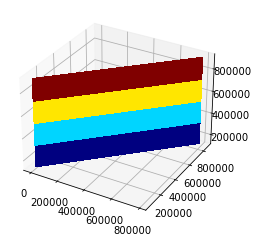

In [82]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x0, y1 = np.meshgrid(X, Y)
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)

Afortunadamente (por lo menos para los fines de este curso) `python` incluye un generador llamado [**Mersenne Twister**](http://en.wikipedia.org/wiki/Mersenne_twister), el cual podemos usar si importamos la biblioteca `random`

In [88]:
import random

# Integración de Monte Carlo

Una técnica de **Monte Carlo** es la integración, el algoritmo es muy simple:

_Recuerda que la integración devuelve el_ **área** _de una figura._

1. Rodea el objeto al cual le quieres calcular el área con una figura de la cual conozcas el área (un rectángulo si es de dos dimensiones) y
2. Genera un número muy grande de puntos al azar dentro de la figura de la cual conoces el área.
3. El área del objeto es aproximadamente la fracción de puntos que cayeron dentro del objeto multiplicada por el área del objeto que la rodea.

### Ejemplo: Calcular el volumen de una esfera de radio $r = 1$

Podemos usar la simetría del problema y concentrarnos en un cuadrante y luego multiplicar por $8$ el resultado. Usemos como figura que conocemos un cubo de lado $1$.


In [89]:
volumen_cubo = 2 * 2 * 2 

N = 100000
count = 0
for j in range(N):
    point = np.array([2*random.random()-1, 2*random.random()-1, 2*random.random()-1])  # Un punto al azar, random() genera valores entre 0-1
    if sum(point**2) < 1:  # x^2 + y^2 + z^2 < 1 ¿Esta dentro?
        count = count + 1
        
fraccion = float(count)/float(N)

volumen = fraccion * volumen_cubo

volumen_esfera = volumen

El volumen de la esfera se puede calcular analiticamente y es igual a 

$$
V = \frac{4}{3} \pi r^3
$$

In [90]:
volumen_esfera

4.1808

In [91]:
volumen = (4.0/3)*math.pi 
volumen

4.1887902047863905

<div class="alert alert-info">
    
**Ejercicio** Calcula 

$$
I = \int_0^\pi \sin x dx
$$

Usando técnicas de Monte Carlo. Compara con el resultado analítico.
</div>

In [95]:
area_seno = 1 * np.pi

N = 1000000
count = 0
for j in range(N):
    point = np.array([random.random()*np.pi, random.random()])  # Un punto al azar, random() genera valores entre 0-1
    if np.sin(point[0]) > point[1]:  # x^2 + y^2 + z^2 < 1 ¿Esta dentro?
        count = count + 1
        
fraccion = float(count)/float(N)

area = fraccion * area_seno

area 

1.99856186569299

<div class="alert alert-info">
    
**Ejercicio** Encuentra el volumen de la intersección de una esfera y un cilindro. La esfera tiene $r = 1$ y está centrada en el origen. El cilindro tiene radio $r = 0.5$ y su eje es perpendicular al eje $x$ y pasa por el punto $(0.5, 0, 0)$.
</div>

In [96]:
area_cubo = 1 * 1 * 1

N = 10000000
count = 0
for j in range(N):
    point = np.array([random.random(), random.random(), random.random()])  # Un punto al azar, random() genera valores entre 0-1
    if sum(point**2)<1 and (point[0]-0.5)**2 + point[1]**2 < 0.25:  # x^2 + y^2 + z^2 < 1 ¿Esta dentro?
        count = count + 1
        
fraccion = float(count)/float(N)

area = fraccion * area_cubo

area*4

1.2063904

array([0.17614207, 0.01999892])